In [1]:
import pandas as pd
import numpy as np
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
connection = mysql.connector.connect(
  host="localhost",      # Nombre o dirección IP del servidor MySQL
  user="root",     # Usuario de la base de datos
  password="Pablo199mx",  # Contraseña del usuario
  database="employees"  # Nombre de la base de datos
)
if connection.is_connected():
    print("Conexión exitosa a la base de datos.")

Conexión exitosa a la base de datos.


In [3]:
cursor = connection.cursor() #Crear consultas

In [4]:
cursor.execute("SHOW TABLES")
tables = cursor.fetchall()

for table in tables:
    print(table[0])

current_dept_emp
departments
dept_emp
dept_emp_latest_date
dept_manager
employees
salaries
titles


In [5]:
def importar_tablas(nombre_tabla):
    consulta= f'SELECT * FROM {nombre_tabla}'
    df = pd.read_sql_query(consulta,connection)
    globals()[f'df_{nombre_tabla}'] = df


In [6]:
importar_tablas('current_dept_emp')
importar_tablas('departments')
importar_tablas('dept_emp')
importar_tablas('dept_emp_latest_date')
importar_tablas('dept_manager')
importar_tablas('employees')
importar_tablas('salaries')
importar_tablas('titles')

C:\Users\Pablo\AppData\Local\Temp\ipykernel_35920\1861495577.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(consulta,connection)
C:\Users\Pablo\AppData\Local\Temp\ipykernel_35920\1861495577.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(consulta,connection)
C:\Users\Pablo\AppData\Local\Temp\ipykernel_35920\1861495577.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(consulta,connection)
C:\Users\Pablo\AppData\Local\Temp\ipykernel_35920\18614955

In [7]:
for table in tables:
    table_name = table[0]
    cursor.execute(f"DESCRIBE {table_name}")
    columns = cursor.fetchall()
    print(f"Tabla: {table_name}")
    for column in columns:
        print(column)
    print()

Tabla: current_dept_emp
('emp_no', b'int', 'NO', '', None, '')
('dept_no', b'char(4)', 'NO', '', None, '')
('from_date', b'date', 'YES', '', None, '')
('to_date', b'date', 'YES', '', None, '')

Tabla: departments
('dept_no', b'char(4)', 'NO', 'PRI', None, '')
('dept_name', b'varchar(40)', 'NO', 'UNI', None, '')

Tabla: dept_emp
('emp_no', b'int', 'NO', 'PRI', None, '')
('dept_no', b'char(4)', 'NO', 'PRI', None, '')
('from_date', b'date', 'NO', '', None, '')
('to_date', b'date', 'NO', '', None, '')

Tabla: dept_emp_latest_date
('emp_no', b'int', 'NO', '', None, '')
('from_date', b'date', 'YES', '', None, '')
('to_date', b'date', 'YES', '', None, '')

Tabla: dept_manager
('emp_no', b'int', 'NO', 'PRI', None, '')
('dept_no', b'char(4)', 'NO', 'PRI', None, '')
('from_date', b'date', 'NO', '', None, '')
('to_date', b'date', 'NO', '', None, '')

Tabla: employees
('emp_no', b'int', 'NO', 'PRI', None, '')
('birth_date', b'date', 'NO', '', None, '')
('first_name', b'varchar(14)', 'NO', '', None

In [8]:
for table in tables:
    table_name = table[0]
    cursor.execute(f"SHOW CREATE TABLE {table_name}")
    create_table = cursor.fetchone()[1]
    print(f"Tabla: {table_name}")
    print(create_table)
    print()

Tabla: current_dept_emp
CREATE ALGORITHM=UNDEFINED DEFINER=`root`@`localhost` SQL SECURITY DEFINER VIEW `current_dept_emp` AS select `l`.`emp_no` AS `emp_no`,`d`.`dept_no` AS `dept_no`,`l`.`from_date` AS `from_date`,`l`.`to_date` AS `to_date` from (`dept_emp` `d` join `dept_emp_latest_date` `l` on(((`d`.`emp_no` = `l`.`emp_no`) and (`d`.`from_date` = `l`.`from_date`) and (`l`.`to_date` = `d`.`to_date`))))

Tabla: departments
CREATE TABLE `departments` (
  `dept_no` char(4) NOT NULL,
  `dept_name` varchar(40) NOT NULL,
  PRIMARY KEY (`dept_no`),
  UNIQUE KEY `dept_name` (`dept_name`)
) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci

Tabla: dept_emp
CREATE TABLE `dept_emp` (
  `emp_no` int NOT NULL,
  `dept_no` char(4) NOT NULL,
  `from_date` date NOT NULL,
  `to_date` date NOT NULL,
  PRIMARY KEY (`emp_no`,`dept_no`),
  KEY `dept_no` (`dept_no`),
  CONSTRAINT `dept_emp_ibfk_1` FOREIGN KEY (`emp_no`) REFERENCES `employees` (`emp_no`) ON DELETE CASCADE,
  CONSTRAINT `dep

In [9]:
pd.set_option('display.float_format', '{:.2f}'.format)  #Eliminar notacion cientifica

In [10]:
def valores_nulos(data):
    return data.isna().sum()

In [11]:
valores_nulos(df_titles)

emp_no       0
title        0
from_date    0
to_date      0
dtype: int64

In [12]:
df_salaries['salary'].describe()

count   2844047.00
mean      63810.74
std       16904.83
min       38623.00
25%       50507.00
50%       61143.00
75%       74192.00
max      158220.00
Name: salary, dtype: float64

In [13]:
df_titles['title'].value_counts()

Engineer              115003
Staff                 107391
Senior Engineer        97750
Senior Staff           92853
Technique Leader       15159
Assistant Engineer     15128
Manager                   24
Name: title, dtype: int64

In [14]:
df_employees['gender'].value_counts()

M    179973
F    120051
Name: gender, dtype: int64

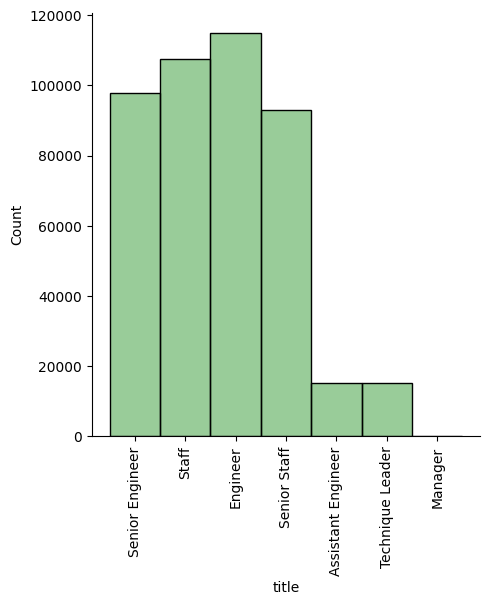

In [15]:
g=sns.displot(df_titles['title'],color='g',bins=100,alpha=0.4)
g.set_xticklabels(rotation=90)

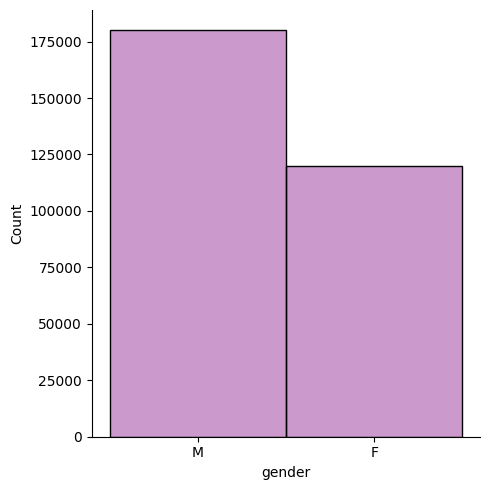

In [16]:
sns.displot(df_employees['gender'],color='purple',bins=100,alpha=0.4)

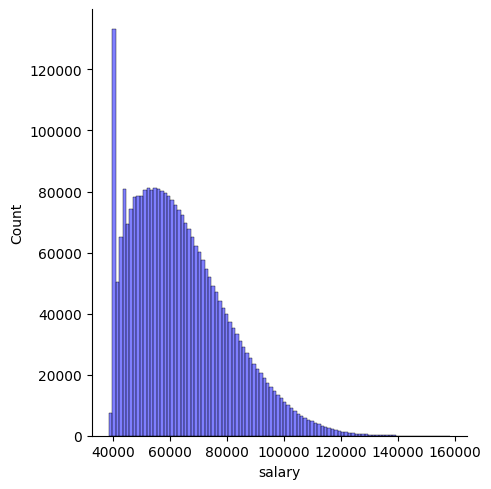

In [17]:
sns.displot(df_salaries['salary'],color='blue',bins=100,alpha=0.5)

In [18]:
from datetime import date

In [19]:
fecha=date(year=2000,month=4,day=23)
df_employees['Edad']=(fecha-df_employees['birth_date']).astype('<m8[Y]')

In [20]:
df_employees['Edad'].describe()

count   300024.00
mean        41.23
std          3.76
min         35.00
25%         38.00
50%         41.00
75%         44.00
max         48.00
Name: Edad, dtype: float64

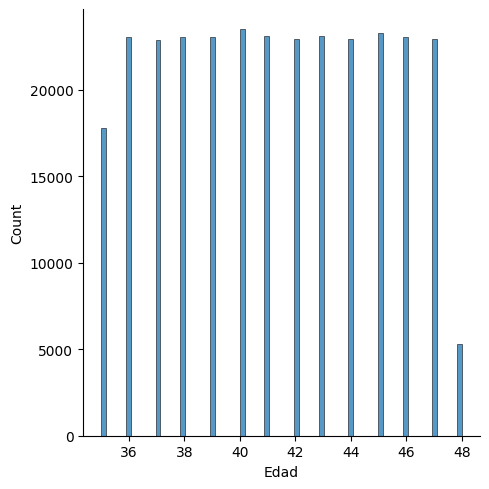

In [21]:
sns.displot(df_employees['Edad'])

In [22]:
df_employees['Antiguedad']=(fecha-df_employees['hire_date']).astype('<m8[Y]')

In [23]:
df_employees['Antiguedad'].describe()

count   300024.00
mean         9.73
std          3.54
min          0.00
25%          7.00
50%         10.00
75%         13.00
max         15.00
Name: Antiguedad, dtype: float64

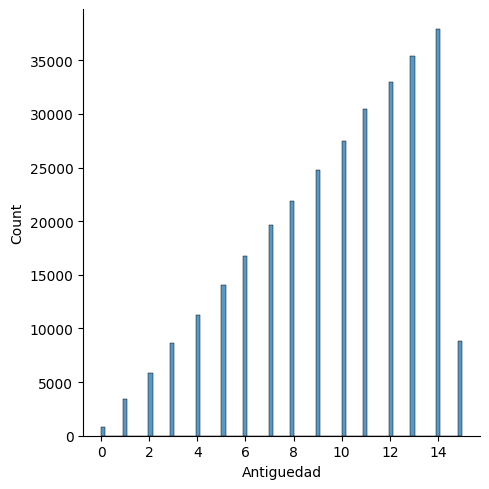

In [24]:
sns.displot(df_employees['Antiguedad'])

Segmentaciones

In [25]:
df_employees['Edad_Seg']=pd.cut(df_employees['Edad'],bins=[34,39,44,49],labels=['35-39',
                                                           '40-44','45-49'])

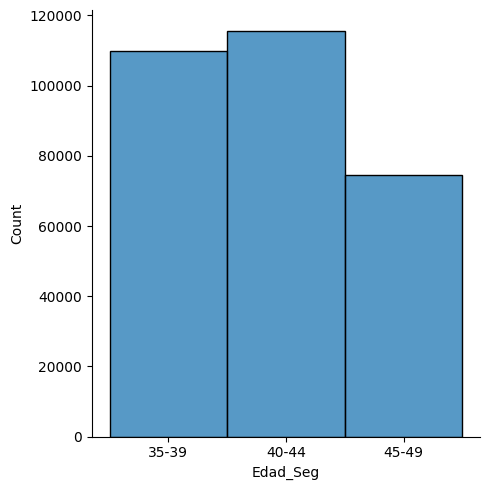

In [26]:
sns.displot(df_employees['Edad_Seg'])

In [27]:
df_employees['Antiguedad_Seg']=pd.cut(df_employees['Antiguedad'],bins=[-1,0,4,8,12,16],
                            labels=['<1','1-4','5-9','10-14','>15'])

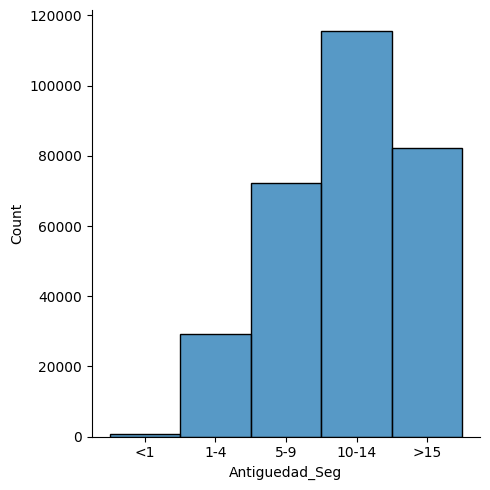

In [28]:
sns.displot(df_employees['Antiguedad_Seg'])

In [29]:
df_salaries['Salary_seg'] = pd.cut(df_salaries['salary'],
                                   bins=[30000, 40000, 50000, 60000, 70000, 80000, 90000,
                                         100000, 110000, 120000, 130000, 140000, 150000, float('inf')],
                                   labels=['>30000 <40000', '>40000 <50000', '>50000 <60000',
                                           '>60000 <70000', '>70000 <80000', '>80000 <90000',
                                           '>90000 <100000', '>100000 <110000', '>110000 <120000',
                                           '>120000 <130000', '>130000 <140000', '>140000 <150000',
                                           '>150000'])

In [30]:
df_salaries['Salary_seg'].value_counts()

>50000 <60000      670517
>60000 <70000      588240
>40000 <50000      570513
>70000 <80000      416227
>80000 <90000      257199
>90000 <100000     139571
>30000 <40000      107084
>100000 <110000     62976
>110000 <120000     23426
>120000 <130000      6572
>130000 <140000      1456
>140000 <150000       230
>150000                36
Name: Salary_seg, dtype: int64

In [31]:
df_salaries.isnull().sum()

emp_no        0
salary        0
from_date     0
to_date       0
Salary_seg    0
dtype: int64

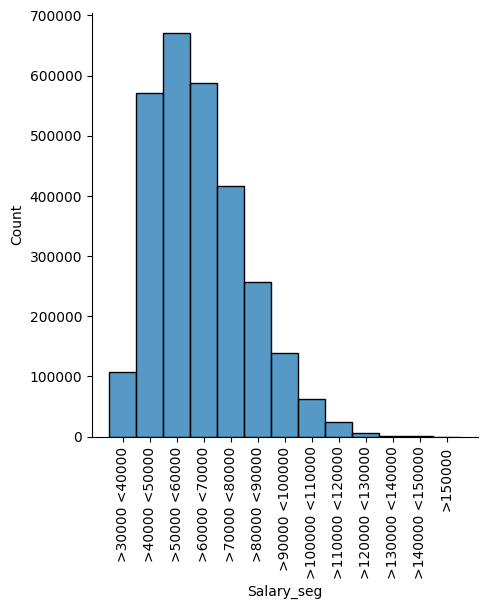

In [32]:
g=sns.displot(df_salaries['Salary_seg'])
g.set_xticklabels(rotation=90)

In [33]:
employees_salary = pd.merge(df_employees, df_salaries, on='emp_no').drop_duplicates('emp_no',keep='last')

In [34]:
salario_genero=employees_salary.groupby('Salary_seg').gender.agg({'value_counts'}).reset_index()

Text(0, 0.5, 'Conteo')

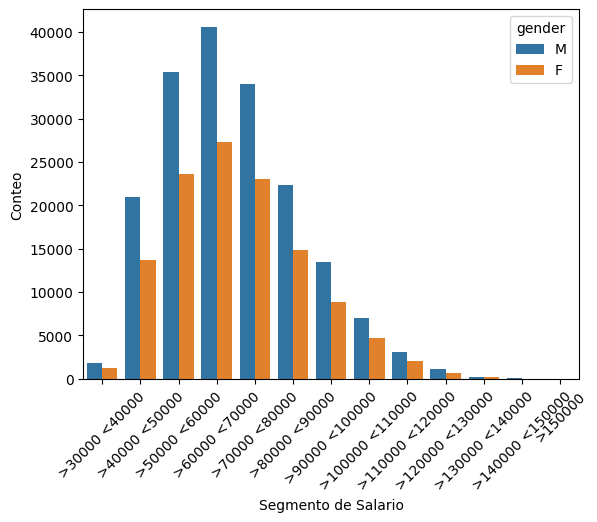

In [35]:
sns.barplot(data=salario_genero, x='Salary_seg', y='value_counts', hue='gender')
plt.xticks(rotation=45)  # Adjust

plt.xlabel('Segmento de Salario')
plt.ylabel('Conteo')

In [36]:
salario_genero['%']=(salario_genero['value_counts']/salario_genero['value_counts'].sum()).round(4)*100
salario_genero

,Salary_seg,gender,value_counts,%
0,>30000 <40000,M,1845,0.61
1,>30000 <40000,F,1272,0.42
2,>40000 <50000,M,20967,6.99
3,>40000 <50000,F,13748,4.58
4,>50000 <60000,M,35327,11.77
5,>50000 <60000,F,23562,7.85
6,>60000 <70000,M,40588,13.53
7,>60000 <70000,F,27258,9.09
8,>70000 <80000,M,34027,11.34
9,>70000 <80000,F,23005,7.67


In [37]:
employees_salary_titles=pd.merge(employees_salary,df_titles,on='emp_no').drop_duplicates('emp_no',keep='last')

In [38]:
employees_salary_titles.rename(columns={'from_date_x':'Fecha Nuevo Salario',
                                        'from_date_y':'Fecha Nuevo Puesto'},inplace=True)

In [39]:
departments=pd.merge(df_departments,df_dept_emp,on='dept_no').drop_duplicates('emp_no',keep='last')

In [40]:
total=pd.merge(employees_salary_titles,departments,on='emp_no')

In [41]:
total.head(5)

,emp_no,birth_date,first_name,last_name,gender,hire_date,Edad,Antiguedad,Edad_Seg,Antiguedad_Seg,...,Fecha Nuevo Salario,to_date_x,Salary_seg,title,Fecha Nuevo Puesto,to_date_y,dept_no,dept_name,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,46.00,13.00,45-49,>15,...,2002-06-22,9999-01-01,>80000 <90000,Senior Engineer,1986-06-26,9999-01-01,d005,Development,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,35.00,14.00,35-39,>15,...,2001-08-02,9999-01-01,>70000 <80000,Staff,1996-08-03,9999-01-01,d007,Sales,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,40.00,13.00,40-44,>15,...,2001-12-01,9999-01-01,>40000 <50000,Senior Engineer,1995-12-03,9999-01-01,d004,Production,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,45.00,13.00,45-49,>15,...,2001-11-27,9999-01-01,>70000 <80000,Senior Engineer,1995-12-01,9999-01-01,d004,Production,1986-12-01,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,45.00,10.00,45-49,10-14,...,2001-09-09,9999-01-01,>90000 <100000,Staff,1989-09-12,1996-09-12,d003,Human Resources,1989-09-12,9999-01-01


In [42]:
total=total.drop(['to_date_x','to_date_y'],axis=1)

In [43]:
total.rename(columns={'from_date':'Fecha Nuevo Departament'},inplace=True)

In [44]:
dataframes=[df_current_dept_emp,df_departments,df_dept_emp,df_dept_emp_latest_date,df_dept_manager,df_employees,df_salaries,df_titles,total]
csv_names = ['current_dept_emp.csv', 'departments.csv', 'dept_emp.csv', 'dept_emp_latest_date.csv', 'dept_manager.csv', 'employees.csv', 'salaries.csv', 'titles.csv','total.csv']

for df, csv_name in zip(dataframes, csv_names):
    df.to_csv(csv_name, index=False)

In [45]:
cursor.close() #Para cerrar el cursor
connection.close() #Para cerrrar conexion